In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ajmer_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Ajmer.csv', skiprows = 2, delimiter=',')
ajmer_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,9.5,97,0.0,960.0,9.4,19.1,83,88
1,2024-01-01T01:00,9.2,98,0.0,960.9,10.1,20.5,84,88
2,2024-01-01T02:00,8.9,98,0.0,961.4,9.7,20.2,88,91
3,2024-01-01T03:00,10.4,90,0.0,962.2,9.7,19.6,90,96
4,2024-01-01T04:00,13.1,78,0.0,963.3,8.6,18.2,92,98
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.7,94,0.0,962.5,7.8,15.3,97,107
8780,2024-12-31T20:00,9.5,94,0.0,962.1,7.8,15.2,95,106
8781,2024-12-31T21:00,9.3,94,0.0,961.6,7.8,15.6,103,111
8782,2024-12-31T22:00,9.0,94,0.0,961.2,7.4,14.7,108,118


In [3]:
ajmer_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Ajmer.csv', delimiter= ',')
ajmer_pollutants['Timestamp'] = ajmer_meteo['time']
ajmer_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
ajmer_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,74.60,146.02,29.72,32.67,62.38,130.58,6.09,0.55,9.92,...,NaN,NaN,98.35,1.23,136.94,0.0,0.0,NaN,735.83,NaN
1,2024-01-01T01:00,75.70,138.60,27.23,23.91,51.14,147.32,6.05,0.51,37.22,...,NaN,NaN,98.40,0.95,229.02,0.0,0.0,NaN,735.70,NaN
2,2024-01-01T02:00,63.00,123.30,24.50,24.18,48.68,128.54,9.86,0.49,44.16,...,NaN,NaN,98.40,1.60,235.02,0.0,0.0,NaN,735.74,NaN
3,2024-01-01T03:00,73.05,127.40,20.94,21.65,42.59,152.11,8.62,0.38,53.69,...,NaN,NaN,98.43,1.50,192.08,0.0,0.0,NaN,735.70,NaN
4,2024-01-01T04:00,59.02,106.20,16.29,19.57,35.86,127.64,9.46,0.50,55.60,...,NaN,NaN,98.50,1.76,208.14,0.0,0.0,NaN,735.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,45.90,105.70,66.54,1.65,55.90,117.58,3.76,0.63,15.21,...,NaN,NaN,98.60,2.57,2.00,0.0,0.0,NaN,749.38,NaN
8780,2024-12-31T20:00,67.03,141.10,62.02,0.79,50.81,126.86,3.69,0.54,15.21,...,NaN,NaN,98.63,2.88,1.71,0.0,0.0,NaN,751.56,NaN
8781,2024-12-31T21:00,48.92,117.28,32.62,6.52,38.76,102.65,5.89,0.57,15.35,...,NaN,NaN,98.65,3.14,1.36,0.0,0.0,NaN,750.62,NaN
8782,2024-12-31T22:00,46.62,100.92,24.20,10.42,34.60,81.18,5.91,0.46,15.31,...,NaN,NaN,98.72,3.21,1.40,0.0,0.0,NaN,751.97,NaN


In [4]:
ajmer = pd.merge(ajmer_meteo.iloc[:, :], ajmer_pollutants.iloc[:, 0:3], on='time')
ajmer

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.5,97,0.0,960.0,9.4,19.1,83,88,74.60,146.02
1,2024-01-01T01:00,9.2,98,0.0,960.9,10.1,20.5,84,88,75.70,138.60
2,2024-01-01T02:00,8.9,98,0.0,961.4,9.7,20.2,88,91,63.00,123.30
3,2024-01-01T03:00,10.4,90,0.0,962.2,9.7,19.6,90,96,73.05,127.40
4,2024-01-01T04:00,13.1,78,0.0,963.3,8.6,18.2,92,98,59.02,106.20
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.7,94,0.0,962.5,7.8,15.3,97,107,45.90,105.70
8780,2024-12-31T20:00,9.5,94,0.0,962.1,7.8,15.2,95,106,67.03,141.10
8781,2024-12-31T21:00,9.3,94,0.0,961.6,7.8,15.6,103,111,48.92,117.28
8782,2024-12-31T22:00,9.0,94,0.0,961.2,7.4,14.7,108,118,46.62,100.92


In [5]:
ajmer['city'] = 'Ajmer'
ajmer

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,9.5,97,0.0,960.0,9.4,19.1,83,88,74.60,146.02,Ajmer
1,2024-01-01T01:00,9.2,98,0.0,960.9,10.1,20.5,84,88,75.70,138.60,Ajmer
2,2024-01-01T02:00,8.9,98,0.0,961.4,9.7,20.2,88,91,63.00,123.30,Ajmer
3,2024-01-01T03:00,10.4,90,0.0,962.2,9.7,19.6,90,96,73.05,127.40,Ajmer
4,2024-01-01T04:00,13.1,78,0.0,963.3,8.6,18.2,92,98,59.02,106.20,Ajmer
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.7,94,0.0,962.5,7.8,15.3,97,107,45.90,105.70,Ajmer
8780,2024-12-31T20:00,9.5,94,0.0,962.1,7.8,15.2,95,106,67.03,141.10,Ajmer
8781,2024-12-31T21:00,9.3,94,0.0,961.6,7.8,15.6,103,111,48.92,117.28,Ajmer
8782,2024-12-31T22:00,9.0,94,0.0,961.2,7.4,14.7,108,118,46.62,100.92,Ajmer


In [6]:
ajmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8478 non-null   float64
 10  PM10 (µg/m³)              8506 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
ajmer = ajmer.interpolate()
ajmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    ajmer[delay1_col] = ajmer[col].shift(1)
    delay2_col = col + "_delay2"
    ajmer[delay2_col] = ajmer[col].shift(2)
    ajmer.loc[0, delay1_col] = ajmer[col].iloc[-1]
    ajmer.loc[1, delay2_col] = ajmer[col].iloc[-1]
    ajmer.loc[0, delay2_col] = ajmer[col].iloc[-2]

ajmer

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.5,97,0.0,960.0,9.4,19.1,83,88,74.60,146.02,Ajmer,42.75,46.62,95.45,100.92
1,2024-01-01T01:00,9.2,98,0.0,960.9,10.1,20.5,84,88,75.70,138.60,Ajmer,74.60,42.75,146.02,95.45
2,2024-01-01T02:00,8.9,98,0.0,961.4,9.7,20.2,88,91,63.00,123.30,Ajmer,75.70,74.60,138.60,146.02
3,2024-01-01T03:00,10.4,90,0.0,962.2,9.7,19.6,90,96,73.05,127.40,Ajmer,63.00,75.70,123.30,138.60
4,2024-01-01T04:00,13.1,78,0.0,963.3,8.6,18.2,92,98,59.02,106.20,Ajmer,73.05,63.00,127.40,123.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.7,94,0.0,962.5,7.8,15.3,97,107,45.90,105.70,Ajmer,37.75,31.60,79.95,56.75
8780,2024-12-31T20:00,9.5,94,0.0,962.1,7.8,15.2,95,106,67.03,141.10,Ajmer,45.90,37.75,105.70,79.95
8781,2024-12-31T21:00,9.3,94,0.0,961.6,7.8,15.6,103,111,48.92,117.28,Ajmer,67.03,45.90,141.10,105.70
8782,2024-12-31T22:00,9.0,94,0.0,961.2,7.4,14.7,108,118,46.62,100.92,Ajmer,48.92,67.03,117.28,141.10


In [9]:
alwar_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Alwar.csv', skiprows=2, delimiter=',')
alwar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.4,100,0.0,985.9,4.9,6.8,306,3
1,2024-01-01T01:00,8.8,99,0.0,987.0,4.1,3.8,308,343
2,2024-01-01T02:00,8.7,99,0.0,987.7,2.8,2.2,310,360
3,2024-01-01T03:00,9.0,98,0.0,988.4,2.3,2.2,342,9
4,2024-01-01T04:00,9.8,97,0.0,989.0,2.5,2.3,45,51
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.4,100,0.0,988.0,2.2,3.7,284,29
8780,2024-12-31T20:00,7.4,100,0.0,987.4,3.2,2.0,270,297
8781,2024-12-31T21:00,7.1,99,0.0,986.7,4.8,5.6,281,301
8782,2024-12-31T22:00,7.4,100,0.0,986.3,5.8,7.4,279,304


In [10]:
alwar_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Alwar.csv', delimiter= ',')
alwar_pollutants['Timestamp'] = alwar_meteo['time']
alwar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
alwar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,65.53,115.66,20.09,37.47,57.56,25.81,14.35,0.90,10.02,...,0.33,NaN,NaN,1.10,90.98,0.00,0.00,17.98,741.62,NaN
1,2024-01-01T01:00,70.50,112.50,18.27,34.40,52.68,22.98,15.80,0.52,11.67,...,0.43,NaN,NaN,1.06,127.30,0.00,0.00,17.69,741.66,NaN
2,2024-01-01T02:00,61.55,90.69,19.32,35.44,54.77,24.05,14.70,0.94,17.04,...,0.81,NaN,NaN,1.12,196.14,0.00,0.00,17.35,741.82,NaN
3,2024-01-01T03:00,61.34,90.15,16.59,31.47,48.06,20.30,14.74,0.88,17.58,...,0.09,NaN,NaN,1.20,111.18,0.00,0.00,16.75,741.81,NaN
4,2024-01-01T04:00,59.01,99.36,15.82,31.09,46.91,19.69,4.98,1.00,16.70,...,0.16,NaN,NaN,0.83,173.08,0.00,0.00,16.59,741.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,50.58,120.36,50.36,77.69,128.06,66.10,13.82,2.44,28.58,...,0.16,NaN,NaN,0.68,100.66,0.00,0.00,13.07,743.32,NaN
8780,2024-12-31T20:00,49.16,143.41,52.30,78.73,131.03,67.74,13.09,2.32,14.01,...,0.18,NaN,NaN,0.94,110.99,0.00,0.00,13.74,743.52,NaN
8781,2024-12-31T21:00,53.26,146.22,52.80,78.57,131.37,67.96,14.21,2.32,8.20,...,0.23,NaN,NaN,0.50,139.88,0.00,0.00,16.47,743.82,NaN
8782,2024-12-31T22:00,57.24,155.77,53.24,78.65,131.90,68.35,11.65,2.68,8.65,...,0.32,NaN,NaN,0.64,100.06,0.05,0.05,18.51,743.70,NaN


In [11]:
alwar = pd.merge(alwar_meteo.iloc[:, :], alwar_pollutants.iloc[:, 0:3], on='time')
alwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.4,100,0.0,985.9,4.9,6.8,306,3,65.53,115.66
1,2024-01-01T01:00,8.8,99,0.0,987.0,4.1,3.8,308,343,70.50,112.50
2,2024-01-01T02:00,8.7,99,0.0,987.7,2.8,2.2,310,360,61.55,90.69
3,2024-01-01T03:00,9.0,98,0.0,988.4,2.3,2.2,342,9,61.34,90.15
4,2024-01-01T04:00,9.8,97,0.0,989.0,2.5,2.3,45,51,59.01,99.36
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.4,100,0.0,988.0,2.2,3.7,284,29,50.58,120.36
8780,2024-12-31T20:00,7.4,100,0.0,987.4,3.2,2.0,270,297,49.16,143.41
8781,2024-12-31T21:00,7.1,99,0.0,986.7,4.8,5.6,281,301,53.26,146.22
8782,2024-12-31T22:00,7.4,100,0.0,986.3,5.8,7.4,279,304,57.24,155.77


In [12]:
alwar['city'] = 'Alwar'
alwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,8.4,100,0.0,985.9,4.9,6.8,306,3,65.53,115.66,Alwar
1,2024-01-01T01:00,8.8,99,0.0,987.0,4.1,3.8,308,343,70.50,112.50,Alwar
2,2024-01-01T02:00,8.7,99,0.0,987.7,2.8,2.2,310,360,61.55,90.69,Alwar
3,2024-01-01T03:00,9.0,98,0.0,988.4,2.3,2.2,342,9,61.34,90.15,Alwar
4,2024-01-01T04:00,9.8,97,0.0,989.0,2.5,2.3,45,51,59.01,99.36,Alwar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.4,100,0.0,988.0,2.2,3.7,284,29,50.58,120.36,Alwar
8780,2024-12-31T20:00,7.4,100,0.0,987.4,3.2,2.0,270,297,49.16,143.41,Alwar
8781,2024-12-31T21:00,7.1,99,0.0,986.7,4.8,5.6,281,301,53.26,146.22,Alwar
8782,2024-12-31T22:00,7.4,100,0.0,986.3,5.8,7.4,279,304,57.24,155.77,Alwar


In [13]:
alwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8520 non-null   float64
 10  PM10 (µg/m³)              8519 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
alwar = alwar.interpolate()
alwar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    alwar[delay1_col] = alwar[col].shift(1)
    delay2_col = col + "_delay2"
    alwar[delay2_col] = alwar[col].shift(2)
    alwar.loc[0, delay1_col] = alwar[col].iloc[-1]
    alwar.loc[1, delay2_col] = alwar[col].iloc[-1]
    alwar.loc[0, delay2_col] = alwar[col].iloc[-2]

alwar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.4,100,0.0,985.9,4.9,6.8,306,3,65.53,115.66,Alwar,65.72,57.24,164.62,155.77
1,2024-01-01T01:00,8.8,99,0.0,987.0,4.1,3.8,308,343,70.50,112.50,Alwar,65.53,65.72,115.66,164.62
2,2024-01-01T02:00,8.7,99,0.0,987.7,2.8,2.2,310,360,61.55,90.69,Alwar,70.50,65.53,112.50,115.66
3,2024-01-01T03:00,9.0,98,0.0,988.4,2.3,2.2,342,9,61.34,90.15,Alwar,61.55,70.50,90.69,112.50
4,2024-01-01T04:00,9.8,97,0.0,989.0,2.5,2.3,45,51,59.01,99.36,Alwar,61.34,61.55,90.15,90.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.4,100,0.0,988.0,2.2,3.7,284,29,50.58,120.36,Alwar,44.68,33.97,107.42,91.44
8780,2024-12-31T20:00,7.4,100,0.0,987.4,3.2,2.0,270,297,49.16,143.41,Alwar,50.58,44.68,120.36,107.42
8781,2024-12-31T21:00,7.1,99,0.0,986.7,4.8,5.6,281,301,53.26,146.22,Alwar,49.16,50.58,143.41,120.36
8782,2024-12-31T22:00,7.4,100,0.0,986.3,5.8,7.4,279,304,57.24,155.77,Alwar,53.26,49.16,146.22,143.41


In [16]:
bikaner_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Bikaner.csv', skiprows=2, delimiter=',')
bikaner_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,6.6,99,0.0,990.2,10.2,18.7,67,71
1,2024-01-01T01:00,6.7,99,0.0,990.9,8.9,17.9,76,81
2,2024-01-01T02:00,6.4,99,0.0,991.5,8.1,14.9,77,82
3,2024-01-01T03:00,7.1,98,0.0,992.1,8.2,12.0,75,81
4,2024-01-01T04:00,7.9,97,0.0,993.1,8.4,7.9,80,87
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.2,86,0.0,992.0,8.8,18.6,95,95
8780,2024-12-31T20:00,9.6,89,0.0,991.6,8.3,17.6,104,106
8781,2024-12-31T21:00,9.1,91,0.0,991.1,7.1,15.6,117,120
8782,2024-12-31T22:00,8.7,92,0.0,991.1,4.9,12.5,114,125


In [17]:
bikaner_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Bikaner.csv', delimiter= ',')
bikaner_pollutants['Timestamp'] = bikaner_meteo['time']
bikaner_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bikaner_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,173.75,320.75,1.65,14.05,9.82,52.50,3.18,0.94,13.28,...,5.72,8.52,85.25,0.60,178.50,0.0,0.0,22.25,NaN,NaN
1,2024-01-01T01:00,166.50,301.00,1.58,12.00,8.65,50.92,2.42,0.96,12.15,...,4.42,7.78,88.25,0.57,23.00,0.0,0.0,20.50,NaN,NaN
2,2024-01-01T02:00,138.75,270.50,1.08,12.62,8.62,50.38,2.10,0.92,10.10,...,3.62,7.48,91.00,0.52,62.25,0.0,0.0,17.50,NaN,NaN
3,2024-01-01T03:00,119.00,218.50,0.73,10.68,7.10,49.02,1.98,0.87,12.85,...,3.10,7.32,92.25,0.55,63.50,0.0,0.0,21.75,NaN,NaN
4,2024-01-01T04:00,87.50,127.75,0.43,10.68,6.90,47.90,2.00,0.88,15.32,...,2.70,7.88,93.00,0.45,70.25,0.0,0.0,25.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,123.25,368.25,5.13,68.53,40.60,29.52,5.40,3.14,3.60,...,27.48,14.22,66.50,0.82,16.00,0.0,0.0,27.50,NaN,NaN
8780,2024-12-31T20:00,114.50,320.50,5.85,40.52,26.30,33.88,3.40,1.69,28.68,...,11.38,13.70,67.75,0.80,35.25,0.0,0.0,26.25,NaN,NaN
8781,2024-12-31T21:00,73.75,178.00,6.52,31.05,21.82,33.05,2.30,1.48,37.95,...,6.95,13.08,70.25,0.50,57.25,0.0,0.0,27.75,NaN,NaN
8782,2024-12-31T22:00,61.00,135.50,6.18,27.90,19.90,34.17,2.08,1.32,38.83,...,4.55,12.18,73.25,0.35,59.25,0.0,0.0,26.75,NaN,NaN


In [18]:
bikaner = pd.merge(bikaner_meteo.iloc[:, :], bikaner_pollutants.iloc[:, 0:3], on='time')
bikaner

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.6,99,0.0,990.2,10.2,18.7,67,71,173.75,320.75
1,2024-01-01T01:00,6.7,99,0.0,990.9,8.9,17.9,76,81,166.50,301.00
2,2024-01-01T02:00,6.4,99,0.0,991.5,8.1,14.9,77,82,138.75,270.50
3,2024-01-01T03:00,7.1,98,0.0,992.1,8.2,12.0,75,81,119.00,218.50
4,2024-01-01T04:00,7.9,97,0.0,993.1,8.4,7.9,80,87,87.50,127.75
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.2,86,0.0,992.0,8.8,18.6,95,95,123.25,368.25
8780,2024-12-31T20:00,9.6,89,0.0,991.6,8.3,17.6,104,106,114.50,320.50
8781,2024-12-31T21:00,9.1,91,0.0,991.1,7.1,15.6,117,120,73.75,178.00
8782,2024-12-31T22:00,8.7,92,0.0,991.1,4.9,12.5,114,125,61.00,135.50


In [19]:
bikaner['city'] = 'Bikaner'
bikaner

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,6.6,99,0.0,990.2,10.2,18.7,67,71,173.75,320.75,Bikaner
1,2024-01-01T01:00,6.7,99,0.0,990.9,8.9,17.9,76,81,166.50,301.00,Bikaner
2,2024-01-01T02:00,6.4,99,0.0,991.5,8.1,14.9,77,82,138.75,270.50,Bikaner
3,2024-01-01T03:00,7.1,98,0.0,992.1,8.2,12.0,75,81,119.00,218.50,Bikaner
4,2024-01-01T04:00,7.9,97,0.0,993.1,8.4,7.9,80,87,87.50,127.75,Bikaner
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.2,86,0.0,992.0,8.8,18.6,95,95,123.25,368.25,Bikaner
8780,2024-12-31T20:00,9.6,89,0.0,991.6,8.3,17.6,104,106,114.50,320.50,Bikaner
8781,2024-12-31T21:00,9.1,91,0.0,991.1,7.1,15.6,117,120,73.75,178.00,Bikaner
8782,2024-12-31T22:00,8.7,92,0.0,991.1,4.9,12.5,114,125,61.00,135.50,Bikaner


In [20]:
bikaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8545 non-null   float64
 10  PM10 (µg/m³)              8505 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
bikaner = bikaner.interpolate()
bikaner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bikaner[delay1_col] = bikaner[col].shift(1)
    delay2_col = col + "_delay2"
    bikaner[delay2_col] = bikaner[col].shift(2)
    bikaner.loc[0, delay1_col] = bikaner[col].iloc[-1]
    bikaner.loc[1, delay2_col] = bikaner[col].iloc[-1]
    bikaner.loc[0, delay2_col] = bikaner[col].iloc[-2]

bikaner

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.6,99,0.0,990.2,10.2,18.7,67,71,173.75,320.75,Bikaner,58.25,61.00,123.00,135.50
1,2024-01-01T01:00,6.7,99,0.0,990.9,8.9,17.9,76,81,166.50,301.00,Bikaner,173.75,58.25,320.75,123.00
2,2024-01-01T02:00,6.4,99,0.0,991.5,8.1,14.9,77,82,138.75,270.50,Bikaner,166.50,173.75,301.00,320.75
3,2024-01-01T03:00,7.1,98,0.0,992.1,8.2,12.0,75,81,119.00,218.50,Bikaner,138.75,166.50,270.50,301.00
4,2024-01-01T04:00,7.9,97,0.0,993.1,8.4,7.9,80,87,87.50,127.75,Bikaner,119.00,138.75,218.50,270.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.2,86,0.0,992.0,8.8,18.6,95,95,123.25,368.25,Bikaner,77.25,45.50,241.50,131.75
8780,2024-12-31T20:00,9.6,89,0.0,991.6,8.3,17.6,104,106,114.50,320.50,Bikaner,123.25,77.25,368.25,241.50
8781,2024-12-31T21:00,9.1,91,0.0,991.1,7.1,15.6,117,120,73.75,178.00,Bikaner,114.50,123.25,320.50,368.25
8782,2024-12-31T22:00,8.7,92,0.0,991.1,4.9,12.5,114,125,61.00,135.50,Bikaner,73.75,114.50,178.00,320.50


In [23]:
jaipur_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Jaipur.csv', skiprows=2, delimiter = ',')
jaipur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.3,100,0.0,965.7,8.1,16.4,45,57
1,2024-01-01T01:00,8.4,98,0.0,966.7,9.4,14.2,47,54
2,2024-01-01T02:00,8.1,99,0.0,967.2,9.2,12.4,48,54
3,2024-01-01T03:00,8.3,97,0.0,967.8,7.9,11.6,47,54
4,2024-01-01T04:00,9.9,89,0.0,968.8,6.7,9.6,54,56
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.2,97,0.0,968.0,4.8,10.9,27,74
8780,2024-12-31T20:00,7.7,99,0.0,967.3,5.1,9.6,17,64
8781,2024-12-31T21:00,6.4,100,0.0,966.5,3.6,7.4,9,64
8782,2024-12-31T22:00,6.3,100,0.0,966.2,2.2,4.9,360,86


In [24]:
jaipur_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Jaipur.csv', delimiter= ',')
jaipur_pollutants['Timestamp'] = jaipur_meteo['time']
jaipur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
jaipur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,119.84,196.21,18.78,28.80,36.22,35.92,7.95,0.89,26.07,...,0.74,12.27,86.23,0.64,103.21,0.0,0.0,49.08,736.44,-0.57
1,2024-01-01T01:00,125.88,201.71,18.28,22.48,30.36,33.33,6.23,0.82,23.18,...,0.94,11.75,88.16,0.56,114.71,0.0,0.0,48.00,736.63,-0.64
2,2024-01-01T02:00,114.58,187.98,14.02,23.82,28.72,33.69,10.01,0.82,26.17,...,0.79,11.40,90.12,0.76,83.29,0.0,0.0,48.84,736.41,-0.63
3,2024-01-01T03:00,102.84,174.02,15.62,24.22,29.82,32.31,10.35,0.86,27.14,...,1.01,11.23,91.61,0.90,111.95,0.0,0.0,48.35,736.35,-0.58
4,2024-01-01T04:00,102.43,168.15,13.47,20.61,25.70,31.24,8.83,0.74,27.54,...,0.84,10.80,93.01,0.86,112.97,0.0,0.0,47.76,736.30,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,90.21,144.83,41.66,53.33,69.98,39.17,12.52,1.73,11.68,...,5.68,9.40,96.71,0.57,162.71,0.0,0.0,56.79,737.40,-0.80
8780,2024-12-31T20:00,112.55,166.11,41.42,53.72,69.44,38.50,11.95,1.70,13.45,...,7.21,9.22,97.11,0.40,188.05,0.0,0.0,55.48,737.60,-0.80
8781,2024-12-31T21:00,118.93,178.22,35.95,51.53,63.62,38.20,13.28,1.63,13.56,...,10.49,8.98,97.35,0.48,119.80,0.0,0.0,54.92,737.61,-0.81
8782,2024-12-31T22:00,113.63,173.05,32.85,45.47,59.63,38.52,12.74,1.48,14.05,...,12.13,8.46,97.70,0.41,156.08,0.0,0.0,55.34,737.55,-0.81


In [25]:
jaipur = pd.merge(jaipur_meteo.iloc[:, :], jaipur_pollutants.iloc[:, 0:3], on='time')
jaipur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.3,100,0.0,965.7,8.1,16.4,45,57,119.84,196.21
1,2024-01-01T01:00,8.4,98,0.0,966.7,9.4,14.2,47,54,125.88,201.71
2,2024-01-01T02:00,8.1,99,0.0,967.2,9.2,12.4,48,54,114.58,187.98
3,2024-01-01T03:00,8.3,97,0.0,967.8,7.9,11.6,47,54,102.84,174.02
4,2024-01-01T04:00,9.9,89,0.0,968.8,6.7,9.6,54,56,102.43,168.15
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.2,97,0.0,968.0,4.8,10.9,27,74,90.21,144.83
8780,2024-12-31T20:00,7.7,99,0.0,967.3,5.1,9.6,17,64,112.55,166.11
8781,2024-12-31T21:00,6.4,100,0.0,966.5,3.6,7.4,9,64,118.93,178.22
8782,2024-12-31T22:00,6.3,100,0.0,966.2,2.2,4.9,360,86,113.63,173.05


In [26]:
jaipur['city'] = 'Jaipur'
jaipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8782 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
jaipur = jaipur.interpolate()
jaipur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [28]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    jaipur[delay1_col] = jaipur[col].shift(1)
    delay2_col = col + "_delay2"
    jaipur[delay2_col] = jaipur[col].shift(2)
    jaipur.loc[0, delay1_col] = jaipur[col].iloc[-1]
    jaipur.loc[1, delay2_col] = jaipur[col].iloc[-1]
    jaipur.loc[0, delay2_col] = jaipur[col].iloc[-2]

jaipur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.3,100,0.0,965.7,8.1,16.4,45,57,119.84,196.21,Jaipur,102.35,113.63,162.14,173.05
1,2024-01-01T01:00,8.4,98,0.0,966.7,9.4,14.2,47,54,125.88,201.71,Jaipur,119.84,102.35,196.21,162.14
2,2024-01-01T02:00,8.1,99,0.0,967.2,9.2,12.4,48,54,114.58,187.98,Jaipur,125.88,119.84,201.71,196.21
3,2024-01-01T03:00,8.3,97,0.0,967.8,7.9,11.6,47,54,102.84,174.02,Jaipur,114.58,125.88,187.98,201.71
4,2024-01-01T04:00,9.9,89,0.0,968.8,6.7,9.6,54,56,102.43,168.15,Jaipur,102.84,114.58,174.02,187.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.2,97,0.0,968.0,4.8,10.9,27,74,90.21,144.83,Jaipur,71.71,62.33,116.56,102.50
8780,2024-12-31T20:00,7.7,99,0.0,967.3,5.1,9.6,17,64,112.55,166.11,Jaipur,90.21,71.71,144.83,116.56
8781,2024-12-31T21:00,6.4,100,0.0,966.5,3.6,7.4,9,64,118.93,178.22,Jaipur,112.55,90.21,166.11,144.83
8782,2024-12-31T22:00,6.3,100,0.0,966.2,2.2,4.9,360,86,113.63,173.05,Jaipur,118.93,112.55,178.22,166.11


In [29]:
jaisalmer_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Jaisalmer.csv', skiprows=2, delimiter = ',')
jaisalmer_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,9.2,95,0.0,989.5,12.9,24.6,54,55
1,2024-01-01T01:00,8.4,96,0.0,990.0,12.9,24.3,63,63
2,2024-01-01T02:00,8.1,96,0.0,990.6,12.2,23.7,66,64
3,2024-01-01T03:00,8.7,94,0.0,991.2,11.1,22.5,65,63
4,2024-01-01T04:00,10.7,85,0.0,992.1,9.5,22.4,61,62
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.3,66,0.0,991.3,8.0,19.5,67,67
8780,2024-12-31T20:00,11.7,69,0.0,990.9,7.8,18.5,75,75
8781,2024-12-31T21:00,11.2,72,0.0,990.4,7.5,17.7,69,73
8782,2024-12-31T22:00,10.6,75,0.0,990.0,6.9,16.4,67,69


In [30]:
jaisalmer_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Jaisalmer.csv', delimiter= ',')
jaisalmer_pollutants['Timestamp'] = jaisalmer_meteo['time']
jaisalmer_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
jaisalmer_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,67.50,78.50,0.75,13.45,7.50,38.62,4.60,0.88,50.12,...,0.35,11.85,70.50,1.05,128.50,0.0,0.0,10.00,NaN,NaN
1,2024-01-01T01:00,72.00,83.50,0.70,13.15,7.30,42.50,4.02,0.86,52.42,...,0.35,11.12,72.00,1.08,128.50,0.0,0.0,10.00,NaN,NaN
2,2024-01-01T02:00,65.00,74.25,0.85,11.95,6.78,43.02,3.97,0.86,56.85,...,0.30,10.70,74.00,0.80,128.50,0.0,0.0,10.00,NaN,NaN
3,2024-01-01T03:00,78.50,91.75,0.65,11.50,6.35,42.60,3.80,0.91,56.60,...,0.20,10.32,77.25,0.60,128.50,0.0,0.0,10.00,NaN,NaN
4,2024-01-01T04:00,99.25,117.50,0.30,11.55,6.08,41.88,3.80,0.91,47.42,...,0.22,9.55,80.25,0.82,128.50,0.0,0.0,10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,47.00,109.75,3.70,34.40,21.28,32.95,1.65,0.80,57.80,...,1.62,17.12,50.00,1.30,128.25,0.0,0.0,11.00,NaN,NaN
8780,2024-12-31T20:00,53.50,110.50,2.65,29.00,17.58,36.28,1.45,0.70,60.90,...,1.52,16.80,45.00,1.27,128.50,0.0,0.0,10.50,NaN,NaN
8781,2024-12-31T21:00,49.50,101.75,2.28,20.30,12.62,36.72,1.23,0.59,61.20,...,0.95,16.15,47.00,1.30,128.50,0.0,0.0,10.75,NaN,NaN
8782,2024-12-31T22:00,43.50,80.00,1.75,16.40,10.12,37.58,1.15,0.55,57.62,...,0.40,15.00,51.75,1.05,128.50,0.0,0.0,10.25,NaN,NaN


In [31]:
jaisalmer = pd.merge(jaisalmer_meteo.iloc[:, :], jaisalmer_pollutants.iloc[:, 0:3], on='time')
jaisalmer

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.2,95,0.0,989.5,12.9,24.6,54,55,67.50,78.50
1,2024-01-01T01:00,8.4,96,0.0,990.0,12.9,24.3,63,63,72.00,83.50
2,2024-01-01T02:00,8.1,96,0.0,990.6,12.2,23.7,66,64,65.00,74.25
3,2024-01-01T03:00,8.7,94,0.0,991.2,11.1,22.5,65,63,78.50,91.75
4,2024-01-01T04:00,10.7,85,0.0,992.1,9.5,22.4,61,62,99.25,117.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.3,66,0.0,991.3,8.0,19.5,67,67,47.00,109.75
8780,2024-12-31T20:00,11.7,69,0.0,990.9,7.8,18.5,75,75,53.50,110.50
8781,2024-12-31T21:00,11.2,72,0.0,990.4,7.5,17.7,69,73,49.50,101.75
8782,2024-12-31T22:00,10.6,75,0.0,990.0,6.9,16.4,67,69,43.50,80.00


In [32]:
jaisalmer['city'] = 'Jaisalmer'
jaisalmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8479 non-null   float64
 10  PM10 (µg/m³)              8501 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [33]:
jaisalmer = jaisalmer.interpolate()
jaisalmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    jaisalmer[delay1_col] = jaisalmer[col].shift(1)
    delay2_col = col + "_delay2"
    jaisalmer[delay2_col] = jaisalmer[col].shift(2)
    jaisalmer.loc[0, delay1_col] = jaisalmer[col].iloc[-1]
    jaisalmer.loc[1, delay2_col] = jaisalmer[col].iloc[-1]
    jaisalmer.loc[0, delay2_col] = jaisalmer[col].iloc[-2]

jaisalmer

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.2,95,0.0,989.5,12.9,24.6,54,55,67.50,78.50,Jaisalmer,41.50,43.50,66.25,80.00
1,2024-01-01T01:00,8.4,96,0.0,990.0,12.9,24.3,63,63,72.00,83.50,Jaisalmer,67.50,41.50,78.50,66.25
2,2024-01-01T02:00,8.1,96,0.0,990.6,12.2,23.7,66,64,65.00,74.25,Jaisalmer,72.00,67.50,83.50,78.50
3,2024-01-01T03:00,8.7,94,0.0,991.2,11.1,22.5,65,63,78.50,91.75,Jaisalmer,65.00,72.00,74.25,83.50
4,2024-01-01T04:00,10.7,85,0.0,992.1,9.5,22.4,61,62,99.25,117.50,Jaisalmer,78.50,65.00,91.75,74.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.3,66,0.0,991.3,8.0,19.5,67,67,47.00,109.75,Jaisalmer,32.75,25.25,105.50,80.75
8780,2024-12-31T20:00,11.7,69,0.0,990.9,7.8,18.5,75,75,53.50,110.50,Jaisalmer,47.00,32.75,109.75,105.50
8781,2024-12-31T21:00,11.2,72,0.0,990.4,7.5,17.7,69,73,49.50,101.75,Jaisalmer,53.50,47.00,110.50,109.75
8782,2024-12-31T22:00,10.6,75,0.0,990.0,6.9,16.4,67,69,43.50,80.00,Jaisalmer,49.50,53.50,101.75,110.50


In [35]:
kota_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Kota.csv', skiprows=2, delimiter=',')
kota_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,12.2,97,0.0,985.7,6.5,10.2,357,10
1,2024-01-01T01:00,12.6,95,0.0,986.8,6.8,9.5,360,9
2,2024-01-01T02:00,13.0,92,0.0,987.4,6.6,8.5,9,12
3,2024-01-01T03:00,13.8,88,0.0,987.9,6.9,8.5,6,12
4,2024-01-01T04:00,15.2,83,0.0,988.5,7.2,8.7,18,17
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.9,100,0.0,988.2,2.3,8.1,321,21
8780,2024-12-31T20:00,9.4,100,0.0,987.9,1.9,6.7,299,16
8781,2024-12-31T21:00,9.0,100,0.0,987.4,1.5,6.3,300,20
8782,2024-12-31T22:00,8.5,100,0.0,987.1,2.4,6.2,297,10


In [36]:
kota_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Kota.csv', delimiter= ',')
kota_pollutants['Timestamp'] = kota_meteo['time']
kota_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kota_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,118.98,145.41,2.34,32.53,25.82,24.92,7.67,0.90,16.51,...,5.27,13.52,91.38,0.85,123.37,0.0,0.0,58.38,746.28,NaN
1,2024-01-01T01:00,114.07,147.33,2.14,30.56,24.59,24.96,7.44,0.86,17.51,...,4.74,13.09,92.48,0.64,123.08,0.0,0.0,58.25,746.16,NaN
2,2024-01-01T02:00,114.12,153.88,1.79,23.05,13.73,21.39,8.25,0.84,11.82,...,0.32,12.40,90.88,0.55,163.75,0.0,0.0,58.50,NaN,NaN
3,2024-01-01T03:00,99.07,134.07,2.07,24.09,19.55,24.15,7.73,0.72,18.65,...,3.84,12.02,95.01,0.66,116.17,0.0,0.0,58.25,745.98,NaN
4,2024-01-01T04:00,99.70,130.72,1.99,22.41,18.32,23.51,7.40,0.79,19.68,...,3.98,11.96,96.36,0.84,115.78,0.0,0.0,58.00,745.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,94.72,191.33,54.14,52.00,80.38,61.76,8.48,1.61,9.86,...,0.94,12.39,93.32,0.32,134.68,0.0,0.0,45.88,748.44,NaN
8780,2024-12-31T20:00,120.74,243.27,54.48,45.22,78.04,50.08,8.05,2.24,9.99,...,1.36,12.20,94.61,0.25,196.74,0.0,0.0,45.88,749.06,NaN
8781,2024-12-31T21:00,145.75,279.50,73.58,40.43,90.18,66.69,7.16,2.51,10.37,...,1.44,12.24,95.32,0.14,157.32,0.0,0.0,45.50,749.14,NaN
8782,2024-12-31T22:00,136.14,287.85,80.09,34.02,91.57,72.27,6.98,2.66,9.73,...,1.81,11.70,95.98,0.20,178.85,0.0,0.0,28.50,749.27,NaN


In [37]:
kota = pd.merge(kota_meteo.iloc[:, :], kota_pollutants.iloc[:, 0:3], on='time')
kota

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.2,97,0.0,985.7,6.5,10.2,357,10,118.98,145.41
1,2024-01-01T01:00,12.6,95,0.0,986.8,6.8,9.5,360,9,114.07,147.33
2,2024-01-01T02:00,13.0,92,0.0,987.4,6.6,8.5,9,12,114.12,153.88
3,2024-01-01T03:00,13.8,88,0.0,987.9,6.9,8.5,6,12,99.07,134.07
4,2024-01-01T04:00,15.2,83,0.0,988.5,7.2,8.7,18,17,99.70,130.72
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.9,100,0.0,988.2,2.3,8.1,321,21,94.72,191.33
8780,2024-12-31T20:00,9.4,100,0.0,987.9,1.9,6.7,299,16,120.74,243.27
8781,2024-12-31T21:00,9.0,100,0.0,987.4,1.5,6.3,300,20,145.75,279.50
8782,2024-12-31T22:00,8.5,100,0.0,987.1,2.4,6.2,297,10,136.14,287.85


In [38]:
kota['city'] = 'Kota'
kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8781 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [39]:
kota = kota.interpolate()
kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [40]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kota[delay1_col] = kota[col].shift(1)
    delay2_col = col + "_delay2"
    kota[delay2_col] = kota[col].shift(2)
    kota.loc[0, delay1_col] = kota[col].iloc[-1]
    kota.loc[1, delay2_col] = kota[col].iloc[-1]
    kota.loc[0, delay2_col] = kota[col].iloc[-2]

kota

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.2,97,0.0,985.7,6.5,10.2,357,10,118.98,145.41,Kota,148.07,136.14,308.17,287.85
1,2024-01-01T01:00,12.6,95,0.0,986.8,6.8,9.5,360,9,114.07,147.33,Kota,118.98,148.07,145.41,308.17
2,2024-01-01T02:00,13.0,92,0.0,987.4,6.6,8.5,9,12,114.12,153.88,Kota,114.07,118.98,147.33,145.41
3,2024-01-01T03:00,13.8,88,0.0,987.9,6.9,8.5,6,12,99.07,134.07,Kota,114.12,114.07,153.88,147.33
4,2024-01-01T04:00,15.2,83,0.0,988.5,7.2,8.7,18,17,99.70,130.72,Kota,99.07,114.12,134.07,153.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.9,100,0.0,988.2,2.3,8.1,321,21,94.72,191.33,Kota,81.43,62.67,142.45,125.78
8780,2024-12-31T20:00,9.4,100,0.0,987.9,1.9,6.7,299,16,120.74,243.27,Kota,94.72,81.43,191.33,142.45
8781,2024-12-31T21:00,9.0,100,0.0,987.4,1.5,6.3,300,20,145.75,279.50,Kota,120.74,94.72,243.27,191.33
8782,2024-12-31T22:00,8.5,100,0.0,987.1,2.4,6.2,297,10,136.14,287.85,Kota,145.75,120.74,279.50,243.27


In [41]:
sikar_meteo = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Metrological Data/Sikar.csv', skiprows=2, delimiter=',')
sikar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,6.7,100,0.0,965.7,5.0,4.5,120,61
1,2024-01-01T01:00,6.0,99,0.0,966.2,5.7,4.7,125,67
2,2024-01-01T02:00,5.5,100,0.0,966.7,6.2,5.4,126,86
3,2024-01-01T03:00,6.2,100,0.0,967.5,6.6,5.8,131,97
4,2024-01-01T04:00,8.5,97,0.0,968.4,5.6,5.5,135,113
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,93,0.0,968.1,8.6,12.0,127,129
8780,2024-12-31T20:00,8.1,94,0.0,967.7,9.8,15.1,136,141
8781,2024-12-31T21:00,7.8,95,0.0,967.1,9.1,14.4,141,149
8782,2024-12-31T22:00,7.5,96,0.0,966.6,7.7,11.1,141,158


In [42]:
sikar_pollutants = pd.read_csv('/kaggle/input/rajasthan-aqi/Rajasthan/Pollutants/Sikar.csv', delimiter= ',')
sikar_pollutants['Timestamp'] = sikar_meteo['time']
sikar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
sikar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,139.50,214.25,0.98,23.38,13.20,35.20,0.95,0.92,25.50,...,0.75,8.72,83.00,0.30,174.00,0.0,0.0,63.25,NaN,NaN
1,2024-01-01T01:00,117.25,209.25,0.38,20.42,11.18,36.50,0.72,0.90,24.62,...,0.85,8.60,82.50,0.38,158.00,0.0,0.0,61.00,NaN,NaN
2,2024-01-01T02:00,109.00,210.00,0.30,15.72,8.57,39.95,0.75,0.91,26.50,...,0.90,8.07,83.25,1.02,71.50,0.0,0.0,64.75,NaN,NaN
3,2024-01-01T03:00,100.75,183.75,NaN,11.30,5.92,39.98,0.98,0.92,27.50,...,0.57,6.42,86.75,1.32,88.25,0.0,0.0,67.25,NaN,NaN
4,2024-01-01T04:00,79.75,121.50,0.10,10.38,5.55,37.58,1.27,0.86,23.58,...,0.42,5.55,88.00,1.23,84.50,0.0,0.0,59.25,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,84.50,164.50,9.23,41.80,29.77,55.95,1.80,1.07,5.22,...,1.62,9.18,89.50,0.28,179.75,0.0,0.0,14.75,NaN,NaN
8780,2024-12-31T20:00,89.00,186.50,4.18,25.60,17.02,48.02,1.68,1.10,17.05,...,1.82,9.48,91.25,0.82,99.75,0.0,0.0,16.00,NaN,NaN
8781,2024-12-31T21:00,70.25,160.25,1.20,20.23,11.70,48.15,1.62,1.01,21.95,...,0.52,9.30,92.00,0.62,98.75,0.0,0.0,15.00,NaN,NaN
8782,2024-12-31T22:00,49.25,110.75,1.35,19.65,11.52,49.88,1.60,0.91,20.35,...,0.68,8.75,93.00,1.08,106.00,0.0,0.0,14.75,NaN,NaN


In [43]:
sikar = pd.merge(sikar_meteo.iloc[:, :], sikar_pollutants.iloc[:, 0:3], on='time')
sikar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.7,100,0.0,965.7,5.0,4.5,120,61,139.50,214.25
1,2024-01-01T01:00,6.0,99,0.0,966.2,5.7,4.7,125,67,117.25,209.25
2,2024-01-01T02:00,5.5,100,0.0,966.7,6.2,5.4,126,86,109.00,210.00
3,2024-01-01T03:00,6.2,100,0.0,967.5,6.6,5.8,131,97,100.75,183.75
4,2024-01-01T04:00,8.5,97,0.0,968.4,5.6,5.5,135,113,79.75,121.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,93,0.0,968.1,8.6,12.0,127,129,84.50,164.50
8780,2024-12-31T20:00,8.1,94,0.0,967.7,9.8,15.1,136,141,89.00,186.50
8781,2024-12-31T21:00,7.8,95,0.0,967.1,9.1,14.4,141,149,70.25,160.25
8782,2024-12-31T22:00,7.5,96,0.0,966.6,7.7,11.1,141,158,49.25,110.75


In [44]:
sikar['city'] = 'Sikar'
sikar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8553 non-null   float64
 10  PM10 (µg/m³)              8542 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [45]:
sikar = sikar.interpolate()
sikar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [46]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    sikar[delay1_col] = sikar[col].shift(1)
    delay2_col = col + "_delay2"
    sikar[delay2_col] = sikar[col].shift(2)
    sikar.loc[0, delay1_col] = sikar[col].iloc[-1]
    sikar.loc[1, delay2_col] = sikar[col].iloc[-1]
    sikar.loc[0, delay2_col] = sikar[col].iloc[-2]

sikar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.7,100,0.0,965.7,5.0,4.5,120,61,139.50,214.25,Sikar,36.50,49.25,71.00,110.75
1,2024-01-01T01:00,6.0,99,0.0,966.2,5.7,4.7,125,67,117.25,209.25,Sikar,139.50,36.50,214.25,71.00
2,2024-01-01T02:00,5.5,100,0.0,966.7,6.2,5.4,126,86,109.00,210.00,Sikar,117.25,139.50,209.25,214.25
3,2024-01-01T03:00,6.2,100,0.0,967.5,6.6,5.8,131,97,100.75,183.75,Sikar,109.00,117.25,210.00,209.25
4,2024-01-01T04:00,8.5,97,0.0,968.4,5.6,5.5,135,113,79.75,121.50,Sikar,100.75,109.00,183.75,210.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,8.4,93,0.0,968.1,8.6,12.0,127,129,84.50,164.50,Sikar,66.50,56.00,127.25,109.00
8780,2024-12-31T20:00,8.1,94,0.0,967.7,9.8,15.1,136,141,89.00,186.50,Sikar,84.50,66.50,164.50,127.25
8781,2024-12-31T21:00,7.8,95,0.0,967.1,9.1,14.4,141,149,70.25,160.25,Sikar,89.00,84.50,186.50,164.50
8782,2024-12-31T22:00,7.5,96,0.0,966.6,7.7,11.1,141,158,49.25,110.75,Sikar,70.25,89.00,160.25,186.50


In [47]:
rajasthan_data = pd.concat([ajmer, alwar, bikaner, jaipur, jaisalmer, kota, sikar], axis=0, ignore_index=True)
rajasthan_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.5,97,0.0,960.0,9.4,19.1,83,88,74.60,146.02,Ajmer,42.75,46.62,95.45,100.92
1,2024-01-01T01:00,9.2,98,0.0,960.9,10.1,20.5,84,88,75.70,138.60,Ajmer,74.60,42.75,146.02,95.45
2,2024-01-01T02:00,8.9,98,0.0,961.4,9.7,20.2,88,91,63.00,123.30,Ajmer,75.70,74.60,138.60,146.02
3,2024-01-01T03:00,10.4,90,0.0,962.2,9.7,19.6,90,96,73.05,127.40,Ajmer,63.00,75.70,123.30,138.60
4,2024-01-01T04:00,13.1,78,0.0,963.3,8.6,18.2,92,98,59.02,106.20,Ajmer,73.05,63.00,127.40,123.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61483,2024-12-31T19:00,8.4,93,0.0,968.1,8.6,12.0,127,129,84.50,164.50,Sikar,66.50,56.00,127.25,109.00
61484,2024-12-31T20:00,8.1,94,0.0,967.7,9.8,15.1,136,141,89.00,186.50,Sikar,84.50,66.50,164.50,127.25
61485,2024-12-31T21:00,7.8,95,0.0,967.1,9.1,14.4,141,149,70.25,160.25,Sikar,89.00,84.50,186.50,164.50
61486,2024-12-31T22:00,7.5,96,0.0,966.6,7.7,11.1,141,158,49.25,110.75,Sikar,70.25,89.00,160.25,186.50


In [48]:
rajasthan_data['city'] = rajasthan_data['city'].astype('category')

In [49]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [50]:
X, y = rajasthan_data[input_cols], rajasthan_data[target_cols]

In [51]:
from xgboost import XGBRegressor

In [52]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [53]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
pred_check = model.predict(X)

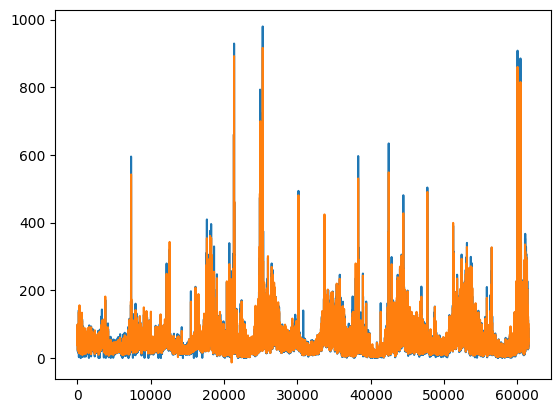

In [55]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.949112777108277


In [57]:
import joblib
joblib.dump(model, 'Rajasthan_PM2.5_µgm³.pkl')

['Rajasthan_PM2.5_µgm³.pkl']

In [58]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
pred_check2 = model.predict(X)

In [60]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9181779854649834


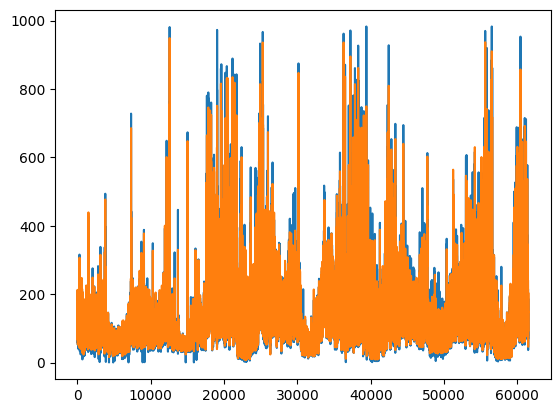

In [61]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [62]:
joblib.dump(model, 'Rajasthan_PM10_µgm³.pkl')

['Rajasthan_PM10_µgm³.pkl']